# Brownian Motion 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import factorial

def get_W(ts):
    W = np.zeros(len(ts))
    W[0] = 0
    for i in range(len(ts)-1):
        delta = ts[i+1] - ts[i]
        rand = np.random.normal(0, np.sqrt(delta))
        W[i+1] = W[i] + rand
    return W

## References

[1] Evarist Giné and Richard Nickl. Mathematical foundations of infinite-dimensional statistical models. Vol. 40. Cambridge University Press, 2016.

[2] Karhunen–Loève theorem, Wikipedia. https://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem

## Show sample paths

In [2]:
step = 1000
ts = np.linspace(0, 1, step)

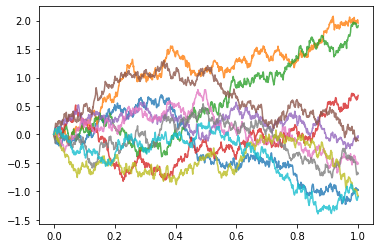

In [3]:
# color ver.
n_trial = 10
for _ in range(n_trial):
    W = get_W(ts)
    plt.plot(ts, W, alpha=0.8)
plt.show()

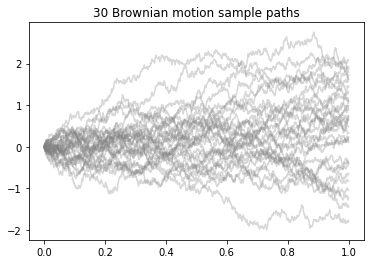

In [4]:
# gray scale
n_trial = 30
for _ in range(n_trial):
    W = get_W(ts)
    plt.plot(ts, W, color="tab:gray", alpha=0.3)
plt.title(f"{n_trial} Brownian motion sample paths")
plt.show()

## How about a lot of sample paths trials?

100%|██████████| 1000/1000 [00:05<00:00, 166.74it/s]


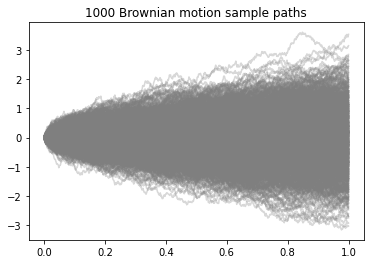

In [5]:
# gray scale
n_trial = 1000
for _ in tqdm(range(n_trial)):
    W = get_W(ts)
    plt.plot(ts, W, color="tab:gray", alpha=0.3)
plt.title(f"{n_trial} Brownian motion sample paths")
plt.show()

## Examine the theorem about small ball concentration using covering number

Suppose that $W(t)$ is a brownian motion and $\varepsilon \in (0, 1]$ , a following theorem holds ([1] Theorem 2.6.26),  $\exists C$, 

$$
 - C \varepsilon^{-2} \le \log P \left( \sup_{t \in [0, 1]} |W(t)|  < \varepsilon \right) \le - \frac{1}{C} \varepsilon^{-2}
$$

Let's check this theorem using monte-carlo experiments!!! That is,

$$
 P \left( \sup_{t \in [0, 1]} |W(t)| < \varepsilon \right) \approx  \frac{1}{n} \sum_{i=1}^{n} {\bf 1} \left\{ \sup_{t \in [0, 1]}|W_i(t)| < \varepsilon \right\}
$$

In [6]:
step = 300
ts = np.linspace(0, 1, step)
n = 10000
max_Ws = np.empty(n)

for i in tqdm(range(n)):
    W = get_W(ts)
    max_Ws[i] = W.max()

100%|██████████| 10000/10000 [00:15<00:00, 661.04it/s]


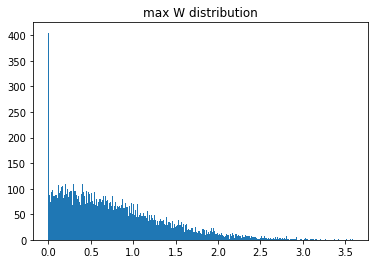

In [7]:
plt.hist(max_Ws, bins=300)
plt.title("max W distribution")
plt.show()

In [8]:
max_eps = 1.0
min_eps = 0.001
step_eps = 10000
eps_list = np.linspace(min_eps, max_eps, step_eps)

# logscale plot
# max_eps_log = -5
# min_eps_log = -10
# step_eps = 10000
# eps_list = np.logspace(min_eps_log, max_eps_log, num=step_eps)

estimated_P_sup_W_below_eps_list = np.empty_like(eps_list)
for i in range(step_eps):
    indicators = max_Ws < eps_list[i]
    estimated_P_sup_W_below_eps_list[i] = indicators.mean()

estimated_logP_sup_W_below_eps_list = np.log(estimated_P_sup_W_below_eps_list)

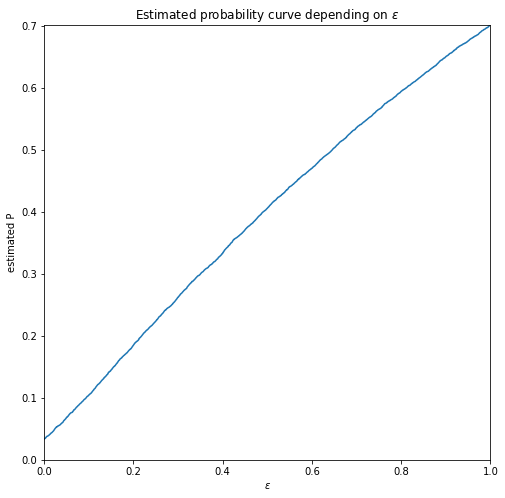

In [9]:
plt.figure(figsize=(8, 8))
plt.plot(eps_list, estimated_P_sup_W_below_eps_list)
plt.title("Estimated probability curve depending on $\epsilon$")
plt.ylabel("estimated P")
plt.ylim(0, estimated_P_sup_W_below_eps_list.max())
plt.xlabel("$\epsilon$")
plt.xlim(0, eps_list.max())
plt.show()

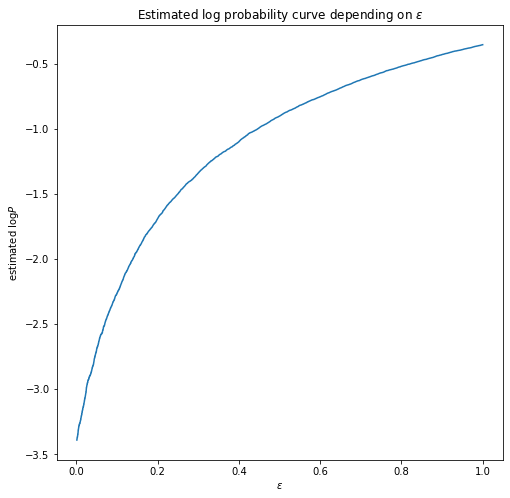

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(eps_list, estimated_logP_sup_W_below_eps_list)
plt.title("Estimated $\log$ probability curve depending on $\epsilon$")
plt.ylabel("estimated $\log P$")
plt.xlabel("$\epsilon$")
plt.show()

To confirm a squared minus low from that theorem, we can easily transform statements as following:

\begin{align*}
    & - C \varepsilon^{-2} \le \log P \left( \sup_{t \in [0, 1]} |W(t)|  < \varepsilon \right) \le - \frac{1}{C} \varepsilon^{-2} \\
    &C \varepsilon^{-2} \ge - \log P \left( \sup_{t \in [0, 1]} |W(t)|  < \varepsilon \right) \ge \frac{1}{C} \varepsilon^{-2} \\
    &- 2 \log \varepsilon + \log C  \ge \log \left(- \log P \left( \sup_{t \in [0, 1]} |W(t)| < \varepsilon \right) \right) \ge -2 \log \varepsilon + \log \frac{1}{C}\\
\end{align*}

Suppose that $x = \log \varepsilon$, we should check following property.

$$ - 2 x + \log C  \ge f(x) \ge -2 x + \log \frac{1}{C}$$

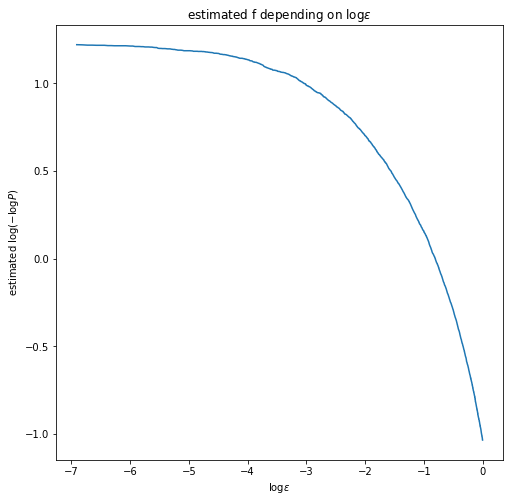

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(np.log(eps_list), np.log(-estimated_logP_sup_W_below_eps_list))
plt.title("estimated f depending on $\log \epsilon$")
plt.ylabel("estimated $\log (-\log P)$")
plt.xlabel("$\log \epsilon$")
plt.show()

This curve is not similar to linear functions, so this approximation might be insufficient, that is,  $\varepsilon$ is much larger than optimal scale in limitation.

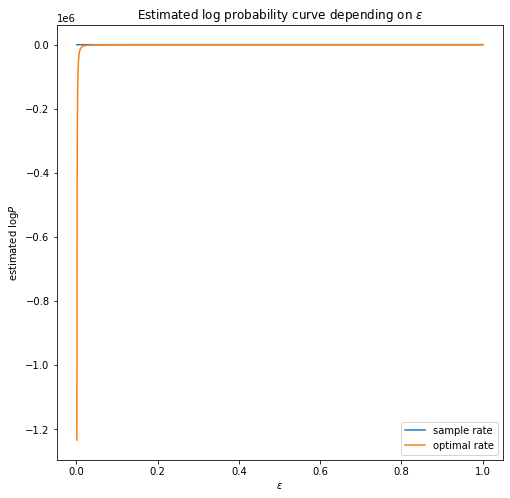

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(eps_list, estimated_logP_sup_W_below_eps_list, label="sample rate")

known_rates = np.array([((-np.pi**2)/8)*eps**(-2) for eps in eps_list])
plt.plot(eps_list, known_rates, label="optimal rate")
plt.title("Estimated $\log$ probability curve depending on $\epsilon$")
plt.ylabel("estimated $\log P$")
plt.xlabel("$\epsilon$")
plt.legend()
plt.show()

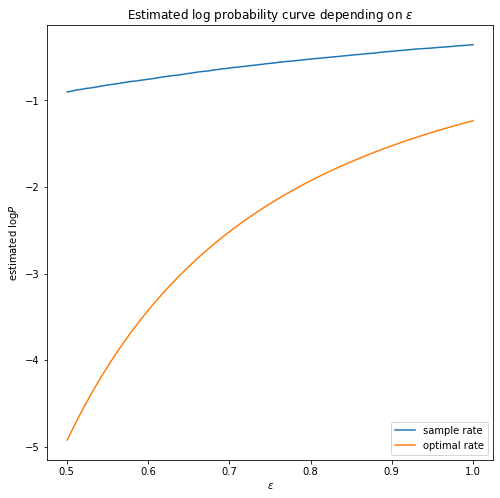

In [13]:
start = 5000
plt.figure(figsize=(8, 8))
plt.plot(eps_list[start:], estimated_logP_sup_W_below_eps_list[start:], label="sample rate")

known_rates = np.array([((-np.pi**2)/8)*eps**(-2) for eps in eps_list])
plt.plot(eps_list[start:], known_rates[start:], label="optimal rate")
plt.title("Estimated $\log$ probability curve depending on $\epsilon$")
plt.ylabel("estimated $\log P$")
plt.xlabel("$\epsilon$")
plt.legend(loc="lower right")
plt.show()

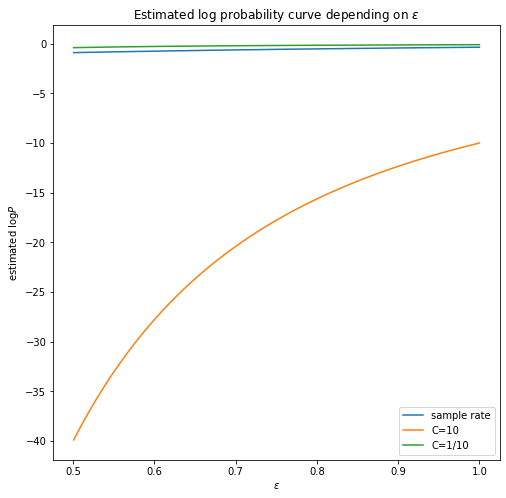

In [14]:
start = 5000
C = 10
plt.figure(figsize=(8, 8))
plt.plot(eps_list[start:], estimated_logP_sup_W_below_eps_list[start:], label="sample rate")

known_rates = np.array([-C*eps**(-2) for eps in eps_list])
known_rates_inv = np.array([-(1/C)*eps**(-2) for eps in eps_list])
plt.plot(eps_list[start:], known_rates[start:], label=f"C={C}")
plt.plot(eps_list[start:], known_rates_inv[start:], label=f"C=1/{C}")
plt.title("Estimated $\log$ probability curve depending on $\epsilon$")
plt.ylabel("estimated $\log P$")
plt.xlabel("$\epsilon$")
plt.legend(loc="lower right")
plt.show()

## Random function Z_k using gaussian expansion

$Z_k$ is defined as following:

$$ Z_k(t) = \sum_{j=0}^{k} \frac{g_j}{j!}t^j $$

where $g_j \sim \mathcal{N}(0, 1)$ i.i.d.

In [15]:
def create_Z_k(k):
    k = k+1
    g_ks = np.random.normal(size=k)
    a_ks = np.array([g_ks[i]/factorial(i) for i in range(k)])
    def Z_k(t):
        t_ks = t*np.ones(k)
        t_ks = np.power(t_ks, range(k))
        return np.dot(a_ks, t_ks)
    return Z_k

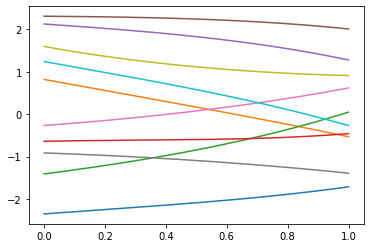

In [16]:
step = 300
ts = np.linspace(0, 1, step)

k = 10 # too large k brokes factorial(k), limited around k < 150
n_trial = 10
for _ in range(n_trial):
    Z_k = create_Z_k(k)
    Z_ks = np.array([Z_k(t) for t in ts])
    plt.plot(ts, Z_ks)
plt.show()

## KL expansion of Brownian motion

Using Karhunen–Loève expansion, Brownian motion can be expressed as following (see [2] Examples -> The Wiener process):
$$ W(t)={\sqrt {2}}\sum _{k=1}^{\infty }Z_{k}{\frac {\sin \left(\left(k-{\frac {1}{2}}\right)\pi t\right)}{\left(k-{\frac {1}{2}}\right)\pi }}$$
We try to check this experession in this section (of course, in a finite setting).

$$ W_n(t)={\sqrt {2}}\sum _{k=1}^{n }Z_{k}{\frac {\sin \left(\left(k-{\frac {1}{2}}\right)\pi t\right)}{\left(k-{\frac {1}{2}}\right)\pi }}$$

In [17]:
def create_W_n(n):
    g_ns = np.random.normal(size=n)
    a_ns = np.sqrt(2)*np.array([g_ns[k-1]/((k - 1/2)*np.pi) for k in range(1, n+1)])
    def W_n(t):
        sins = np.array([np.sin((k - 1/2)*np.pi*t) for k in range(1, n+1)])
        return np.dot(a_ns, sins)
    return W_n

100%|██████████| 10/10 [00:00<00:00, 119.20it/s]


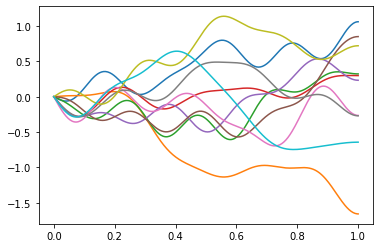

In [18]:
step = 300
ts = np.linspace(0, 1, step)

n = 10
n_trial = 10
for _ in tqdm(range(n_trial)):
    W_n = create_W_n(n)
    W_ns = np.array([W_n(t) for t in ts])
    plt.plot(ts, W_ns)
plt.show()

100%|██████████| 10/10 [00:00<00:00, 19.73it/s]


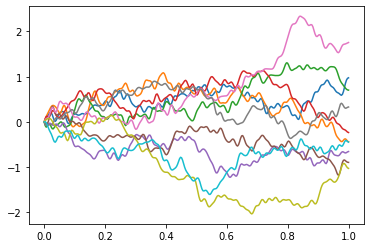

In [19]:
n = 100
n_trial = 10
for _ in tqdm(range(n_trial)):
    W_n = create_W_n(n)
    W_ns = np.array([W_n(t) for t in ts])
    plt.plot(ts, W_ns)
plt.show()

100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


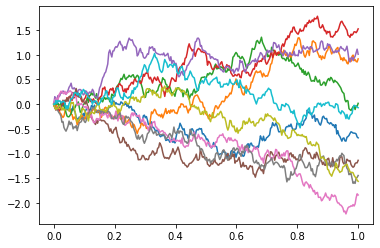

In [20]:
n = 1000
n_trial = 10
for _ in tqdm(range(n_trial)):
    W_n = create_W_n(n)
    W_ns = np.array([W_n(t) for t in ts])
    plt.plot(ts, W_ns)
plt.show()